### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [105]:
data = pd.read_csv('data/coupons.csv')

In [106]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [108]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

2.1 Find Duplicates and drop them

In [109]:
data.duplicated().sum()

74

In [110]:
data = data.drop_duplicates()
data.shape[0]

12610

2.2 Check what are the unique values for car, coffeehouse and carryaway

In [111]:
data.isna().mean()

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991435
Bar                     0.008485
CoffeeHouse             0.017209
CarryAway               0.011895
RestaurantLessThan20    0.010230
Restaurant20To50        0.014988
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

In [112]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [113]:
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

Since the column 'car' has 99% of NaN, its not significant. drop all other NAs

In [115]:
data = data.dropna(subset=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
data.isna().mean()

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991005
Bar                     0.000000
CoffeeHouse             0.000000
CarryAway               0.000000
RestaurantLessThan20    0.000000
Restaurant20To50        0.000000
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

3.1 convert Expiration column into numeric


In [116]:
data['expiration'] = data['expiration'].str.replace('1d','24')
data['expiration'] = data['expiration'].str.replace('2h','2')
print(data['expiration'].unique())
pd.to_numeric(data['expiration'])
data.head()

['24' '2']


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [117]:

print(data[data['Y'] == 1].Y.value_counts()/data.shape[0])

1    0.568418
Name: Y, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon acceptance by passanger category')

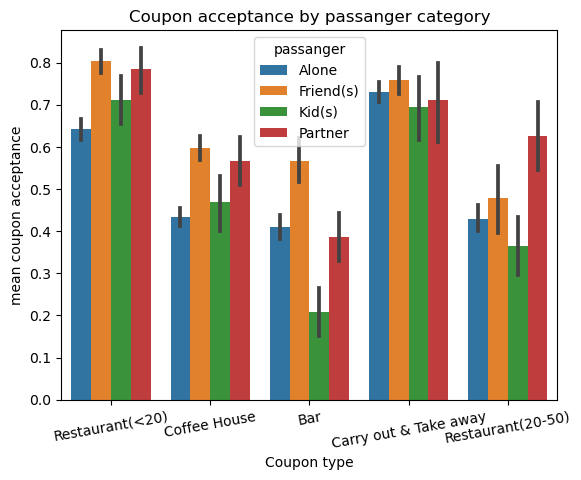

In [118]:

sns.barplot(data=data, x='coupon', y='Y', hue ='passanger')
plt.xticks(rotation=10)
plt.xlabel('Coupon type')
plt.ylabel('mean coupon acceptance')
plt.title('Coupon acceptance by passanger category')

6. Use a histogram to visualize the temperature column.

In [119]:
px.histogram(data,x='temperature', title='Tempurature relation with Coupon acceptance', color='Y')

In [120]:
px.histogram(data,x='temperature', title='Tempurature relation with Coupon acceptance', color='Y', log_x='temperature')

In [121]:
px.violin(data,y='temperature', color='coupon')

In [122]:
px.density_heatmap(data, x='direction_same', y='Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [288]:

df = data.query('coupon == "Bar"')
df.info()
print(df.coupon.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 24 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   object
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1906 non-null 

2. What proportion of bar coupons were accepted?


In [289]:

print(df.groupby('Y')[['coupon']].agg('count').apply(lambda x: x/x.sum()).query('Y == 1'))


     coupon
Y          
1  0.411857


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [290]:
df.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [291]:
#print(df.Bar.unique())
#convert the values in computable Int values

df['BarMax'] = df.replace({'Bar': {'never':0,'less1':1,'1~3':3,'4~8':8,'gt8':10}}).loc[:,'Bar']
df.info()
print(df.Bar.unique())
print(df.BarMax.unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 24 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   object
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1906 non-null 

/var/folders/gr/6jzhjd_x1t566rrrcw8k_0wc0000gp/T/ipykernel_48598/1250320363.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 24 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   object
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1906 non-null 

/var/folders/gr/6jzhjd_x1t566rrrcw8k_0wc0000gp/T/ipykernel_48598/1321936163.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



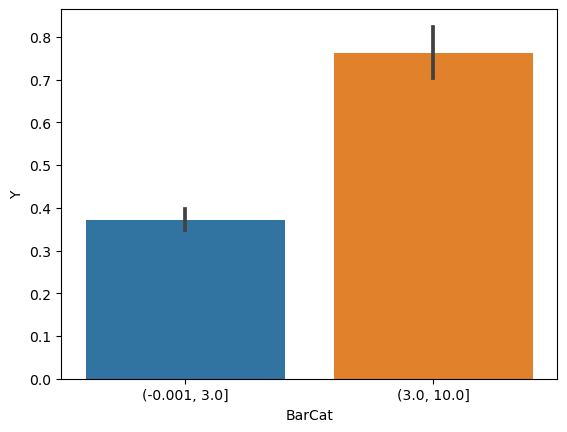

In [292]:
bins =[0,3,10]

df['BarCat'] = pd.cut(df.BarMax, bins, include_lowest=True)

sns.barplot(data=df,x='BarCat',y='Y')
df = df.drop(columns='BarCat')
print(df.info())

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [293]:
#convert the age from object to integer
print(df.age.unique())
df['age'] = df['age'].str.replace('50plus','50').replace('below21','20')
df['age'] = pd.to_numeric(df['age'])
print(df.age.unique())
df.info()



['21' '46' '26' '31' '41' '50plus' '36' 'below21']
[21 46 26 31 41 50 36 20]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 24 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   int64 
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  car      

In [294]:
print(df.query('BarMax > 1 & age >25').Y.mean())
print(df.query('BarMax > 1 & age <=25').Y.mean())

0.6898263027295285
0.6745562130177515


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [302]:
#print(df.passanger.unique())
#print(df.occupation.unique())

print(df.query('BarMax > 1 & passanger != "Kid(s)" & occupation !="Farming Fishing & Forestry"').Y.mean())


0.7094339622641509


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [322]:
#print(df.maritalStatus.unique())
print(df.RestaurantLessThan20.unique())
print(df.income.unique())
list = ['4~8', 'gt8']
listIncome = ['$37500 - $49999','$25000 - $37499','$12500 - $24999','Less than $12500']
print(df.query('BarMax > 1 & passanger != "Kid\(s\)" & maritalStatus !="Widowed"').Y.mean())
#query to confirm the results are correct
#df.query('(BarMax > 1 & passanger != "Kid(s)" & maritalStatus !="Widowed") | (BarMax > 1 & age <30) | (RestaurantLessThan20 in @list & income in @listIncome)').loc[df['passanger']=='Kid(s)',['BarMax','passanger','maritalStatus','age','RestaurantLessThan20','income']]
print(df.query('(BarMax > 1 & passanger != "Kid(s)" & maritalStatus !="Widowed") | (BarMax > 1 & age <30) | (RestaurantLessThan20 in @list & income in @listIncome)').Y.mean())

['4~8' '1~3' 'less1' 'gt8' 'never']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
0.6853146853146853
0.5871313672922251


In [327]:
#compare separately
print(df.query('BarMax > 1 & passanger != "Kid(s)" & maritalStatus !="Widowed"').Y.mean())
print(df.query('BarMax > 1 & age <30').Y.mean())
print(df.query('BarMax > 1 & age >30').Y.mean())
print(df.query('RestaurantLessThan20 in @list & income in @listIncome').Y.mean())

0.7094339622641509
0.7195121951219512
0.639344262295082
0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above observations, drivers who goes to bar more than 3 times a month and doesn't have kids in the passangers 
are more likely to be accepting the bar coupons. The chances are high if the age is below 30. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  